In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Micael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


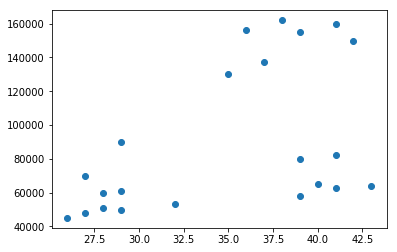

In [4]:
plt.scatter(df.Age, df['Income($)'])


In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [12]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluter,cluster
0,Rob,27,70000,2,2
1,Micael,29,90000,2,2
2,Mohan,29,61000,0,0
3,Ismail,28,60000,0,0
4,Kory,42,150000,1,1


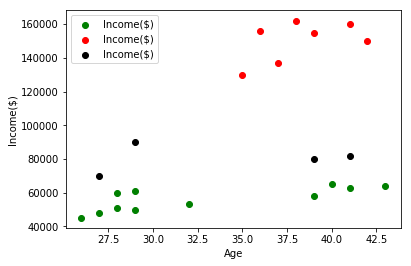

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color= 'green')
plt.scatter(df2.Age, df2['Income($)'], color= 'red')
plt.scatter(df3.Age, df3['Income($)'], color= 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df['Income($)'])

scaler.fit(df.Age)
df.Age = scaler.transform(df.Age)
df

ValueError: Expected 2D array, got 1D array instead:
array=[ 70000.  90000.  61000.  60000. 150000. 155000. 160000. 162000. 156000.
 130000. 137000.  45000.  48000.  51000.  49500.  53000.  65000.  63000.
  64000.  80000.  82000.  58000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [19]:
df['cluster'] = y_predicted
df.drop('cluter', axis= 'columns')
df

,Name,Age,Income($),cluter,cluster
0,Rob,27,70000,2,2
1,Micael,29,90000,2,2
2,Mohan,29,61000,0,1
3,Ismail,28,60000,0,1
4,Kory,42,150000,1,0
5,Gautam,39,155000,1,0
6,David,41,160000,1,0
7,Andrea,38,162000,1,0
8,Brad,36,156000,1,0
9,Angelina,35,130000,1,0


In [21]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color= 'green')
plt.scatter(df2.Age, df2['Income($)'], color= 'red')
plt.scatter(df3.Age, df3['Income($)'], color= 'black')
plt.scatter(km.cluster_centers_[;,0], km.cluster_centers_[:, 1], color= 'purple', marker = '*', label='centroid')


#plt.xlabel('Age')
#plt.ylabel('Income($)')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-23-eb819f9c3814>, line 8)

In [24]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [25]:
sse

[39748148458.545456,
 3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 173633694.45000005,
 119633613.78333332,
 92633459.7]

In [ ]:
plt.xlabel('k')
p